In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
#load the csv dataset file
data = pd.read_csv(r'E:/Python and ML project Videos/Credit Card Fraud Detection/creditcard.csv')


In [3]:
print(data)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
5            2.0  -0.425966   0.960523  1.141109 -0.168252  0.420987   
6            4.0   1.229658   0.141004  0.045371  1.202613  0.191881   
7            7.0  -0.644269   1.417964  1.074380 -0.492199  0.948934   
8            7.0  -0.894286   0.286157 -0.113192 -0.271526  2.669599   
9            9.0  -0.338262   1.119593  1.044367 -0.222187  0.499361   
10          10.0   1.449044  -1.176339  0.913860 -1.375667 -1.971383   
11          10.0   0.384978   0.616109 -0.874300 -0.094019  2.924584   
12          10.0   1.249999  -1.221637  0.383930 -1.234899 -1.48

In [13]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [5]:
#class 0=valid transaction and 1=fraudulent transaction
print(data.shape)

print(data.describe())

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271

In [11]:
#split the dataframe into train and test sets and then save .csv files
train=data.sample(frac=0.75,random_state=200)

train.to_csv(r'E:/Python and ML project Videos/Credit Card Fraud Detection/train.csv')

test=data.drop(train.index)

test.to_csv(r'E:/Python and ML project Videos/Credit Card Fraud Detection/test.csv')
             

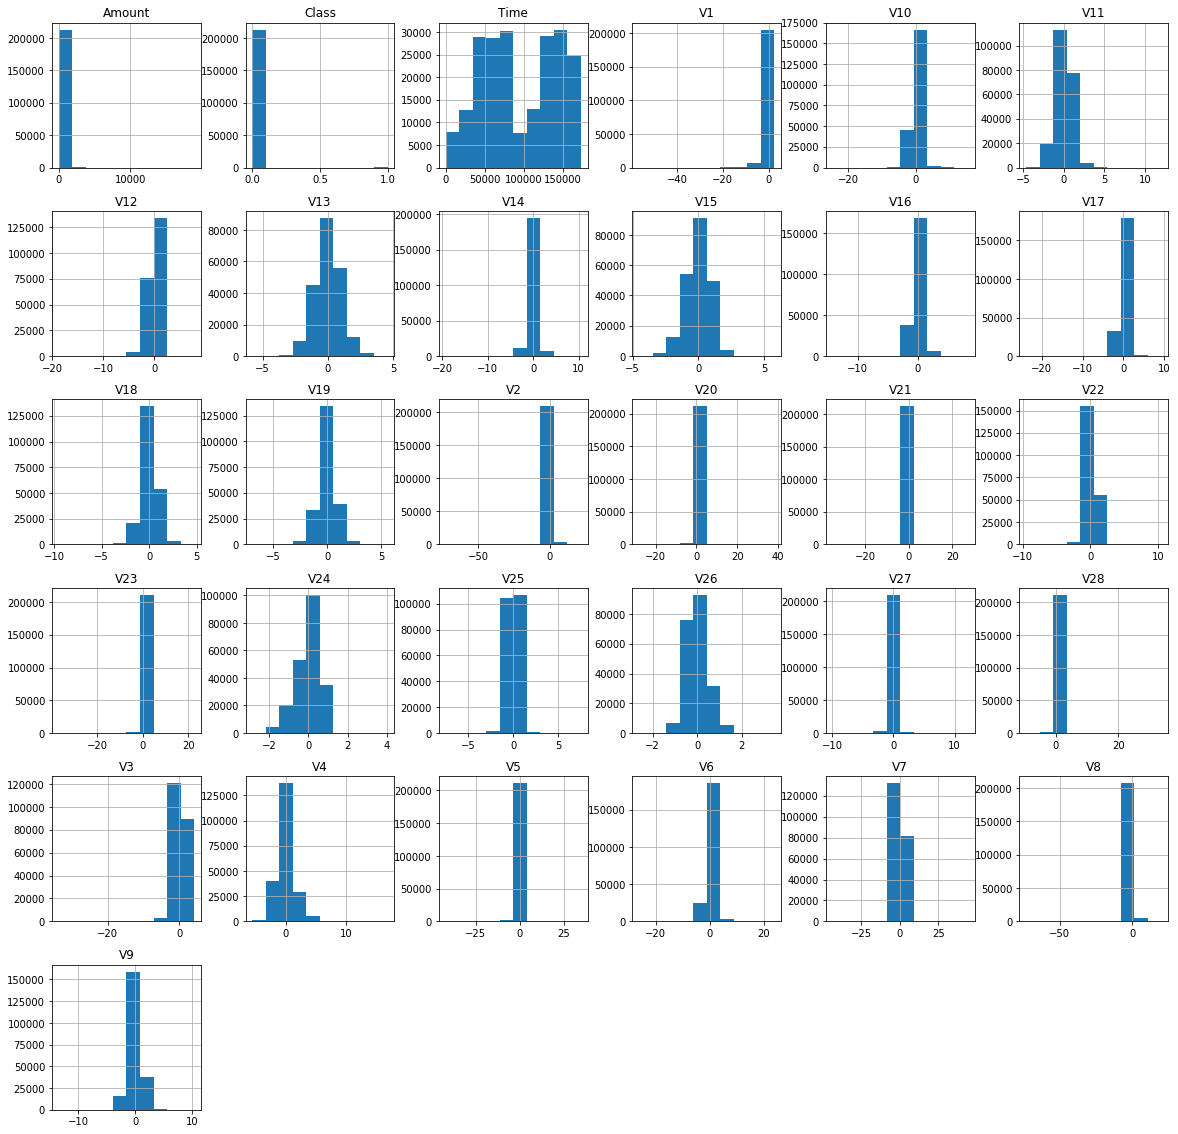

In [14]:
train.hist(figsize = (20,20))
plt.show()


In [24]:
#Determine number of Fraud Cases in the dataset set "data"
frauds = data[data['Class'] == 1]
valids = data[data['Class'] == 0]

print("Frauds = "+ str(len(frauds)))
print("Valids = "+str(len(valids)))

Frauds = 492
Valids = 284315


In [35]:
#Determine number of Fraud Cases in the dataset set "train"
frauds = train[train['Class'] == 1]
valids = train[train['Class'] == 0]

outlier_fraction = len(frauds)/len(valids)

print("Frauds = "+ str(len(frauds)))
print("Valids = "+str(len(valids)))

Frauds = 363
Valids = 213242


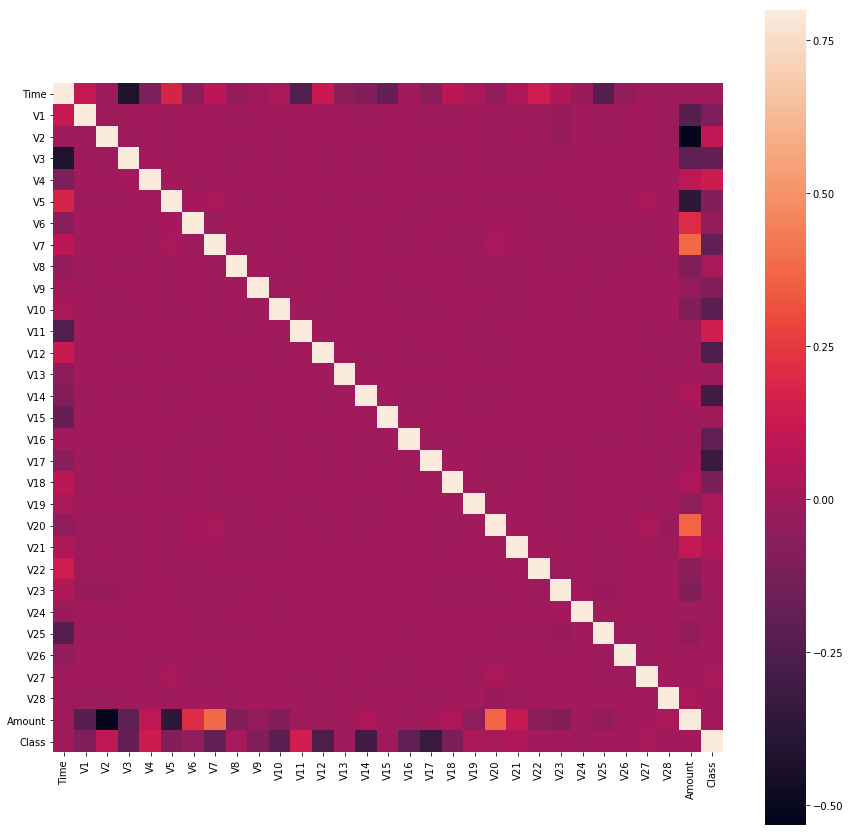

In [29]:
#Correlation Matrix

corrmat = train.corr()
fig = plt.figure(figsize = (15,15))

sns.heatmap(corrmat, vmax=.8, square = True)
plt.show()

In [47]:
#Get all columns for clustering 
col = train.columns.tolist()

#Now remove the "Class" column because clustering is an unsupervised learning technique

col = [c for c in col if c is not ["Class"]]


x = train[col]
y = train["Class"]  #Target variable

x_test = test[col] #because test set has same column names
y_test = test["Class"]

print(x.shape)
print(y.shape)


(213605, 31)
(213605,)


In [45]:
#Apply learning Algorithm

from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

#define a random state
state = 1

#define the outlier detection methods

classifiers = {
    "Isolation Forest": IsolationForest(max_samples  = len(x), 
                                       contamination = outlier_fraction,
                                      random_state = state),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors = 200,
                                              contamination = outlier_fraction)
}

In [50]:
#model fitting

n_outlier = len(frauds)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    #fit the data and tag outliers
    
    if clf_name == "Local Outlier Factor": # we get -1 for outlier and 1 for inlier
        y_pred = clf.fit_predict(x) #fitting and predicting on train set
        scores_pred = clf.negative_outlier_factor_
    
    else:
        clf.fit(x) #fitting on train set
        scores_pred = clf.decision_function(x)
        y_pred = clf.predict(x) #predicting on train set
        
    #Reshape the prediction values to 0 for valid and 1 for fraud
    y_pred[y_pred == 1] =0
    y_pred[y_pred == -1] =1
    
    n_errors = (y_pred != y).sum() #find errors
    
    #Run classifiction metrics
    print('{}: {}'.format(clf_name, n_errors)) #print classifier name and number of wrong predictions
    print(accuracy_score(y, y_pred)) 
    print(classification_report(y,y_pred))
    
    

Isolation Forest: 409
0.9980852508134173
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    213242
          1       0.44      0.44      0.44       363

avg / total       1.00      1.00      1.00    213605

Local Outlier Factor: 721
0.9966246108471244
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    213242
          1       0.01      0.01      0.01       363

avg / total       1.00      1.00      1.00    213605

